In [9]:
import numpy as np
import random

In [36]:
arr=np.array([1,2,3,4])
print(arr)
arr=np.array([[1,2,3],[4,5,6]])
print(arr[0,1])
print(arr[1,-3])
print(arr[1,0:3])
print(arr[0:4,2])

[1 2 3 4]
2
4
[4 5 6]
[3 6]


In [25]:
arr=np.array([1,2,3,4])
print(arr[0:4])
print(arr[-3:-1])


[1 2 3 4]
[2 3]


In [38]:
arr =  np.array([[4,6,7],[5,9,7]])
for x in arr:
    for y in x:
        
        print(y)

4
6
7
5
9
7


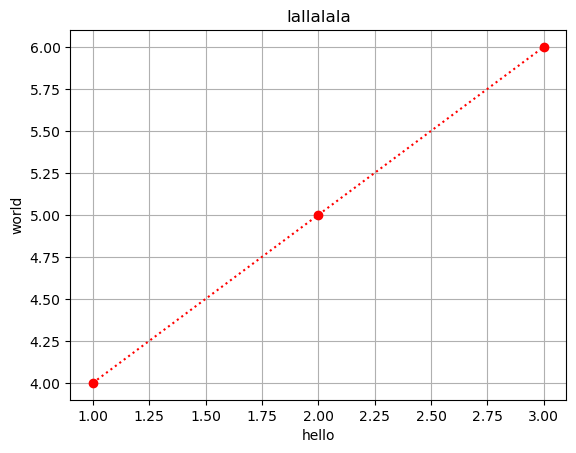

In [47]:
import matplotlib.pyplot as plt
x_axis = np.array([1,2,3])
y_axis = np.array([4,5,6])
plt.plot(x_axis,y_axis,'o:r')
plt.xlabel('hello')
plt.ylabel('world')
plt.title('lallalala')
plt.grid()
plt.show()


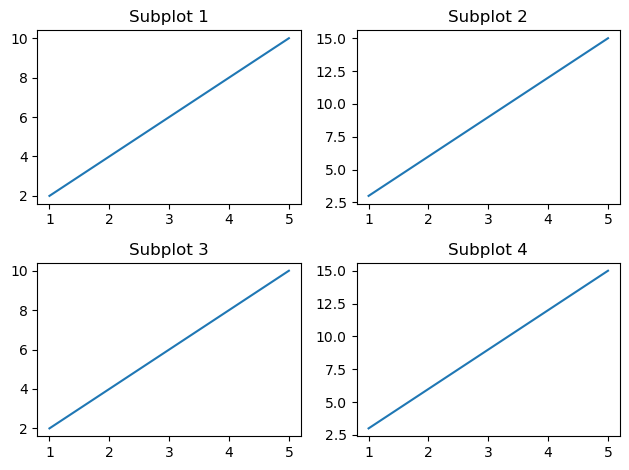

In [48]:
import matplotlib.pyplot as plt

# Create some data
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [3, 6, 9, 12, 15]

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)
plt.plot(x, y1)
plt.title('Subplot 1')

plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.title('Subplot 2')

plt.subplot(2, 2, 3)
plt.plot(x, y1)
plt.title('Subplot 3')

plt.subplot(2, 2, 4)
plt.plot(x, y2)
plt.title('Subplot 4')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the subplots
plt.show()


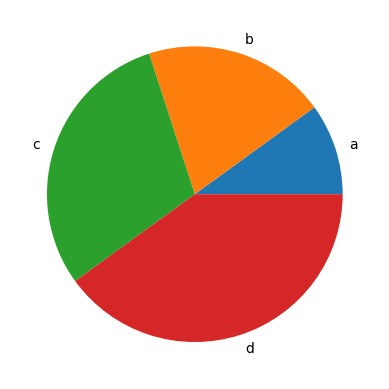

In [52]:
y=np.array([1,2,3,4])
mylabel=['a','b','c','d']
plt.pie(y,labels=mylabel)
plt.show()

In [59]:

import pandas as pd

# Creating a DataFrame from a dictionary
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Age': [25, 35, 30, 28],
        'City': ['New York', 'Paris', 'London', 'Sydney']}

df = pd.DataFrame(data)

print(df)


    Name  Age      City
0   John   25  New York
1   Anna   35     Paris
2  Peter   30    London
3  Linda   28    Sydney


In [8]:
from queue import PriorityQueue

class Tree:
    def __init__(self,value,heuristic=0,cost=0):
        self.value= value
        self.heuristic = heuristic
        self.cost = cost
        self.children =[]
    
    def __lt__(self, other):
        #Define comparison based on cumulative cost
        return self.cost < other.cost
    
    def add_children(self,node,cost):
        self.cost=cost
        self.children.append(node)
    
    def BFS(self,start,stop):
        queue = []
        path = []
        visited = set()
        queue.append(start)
        while queue:
            current = queue.pop(0)
            path.append(current.value)
            
            if current.value == stop.value:
                print('Goal node found as :',current.value)
                print(path)
                return
            for adjacent in current.children:
                if adjacent not in visited:
                    queue.append(adjacent)
                    
    def UCS(self,start,stop):
        queue = PriorityQueue()
        path = []
        visited = set()
        queue.put(start)
        TotalCost = 0
        while queue:
            current = queue.get()
            path.append(current.value) 
            TotalCost = TotalCost + current.cost
            
            if current.value == stop.value:
                print('Goal node found as :',current.value)
                print(path)
                print(TotalCost)
                return
            for adjacent in current.children:
                if adjacent not in visited:
                    queue.put(adjacent)                
                    
    def DFS(self,start,stop,visited = None,path = None):
        if visited is None:
            visited = set()
        if path is None:
            path = []
        visited.add(start)  
        path.append(start.value)
        if start.value == stop.value:
            print('Goal node found as :',start.value)
            print(path)
            return True
        for adjacent in start.children:
        
            if adjacent not in visited:
                if self.DFS(adjacent,stop,visited,path):
                    return True
        return False
    


    def DLS(self,start,stop,depth,visited = None,path = None):
        if visited is None:
            visited = set()
        if path is None:
            path = []
            
        visited.add(start)  
        path.append(start.value)
        
        if start.value == stop.value:
            print('Goal node found as :',start.value)
            print(path)
            return True
        
        if depth == 0:
            return False
        depth -= 1 
        
        for adjacent in start.children:
            if adjacent not in visited:
               
                if self.DLS(adjacent,stop,depth,visited,path):
                    return True
        return False
      
    def IDDFS (self,start,stop,maxdepth):
        for depth in range(maxdepth+1):
            if self.DLS(start,stop,depth):
                return True
        return False    
                 
    

root = Tree('S',0)
node_a = Tree('A',4)
node_h= Tree('H',3)
node_b= Tree('B',5)
node_c = Tree('C',3)
node_i = Tree('I',7)
node_j = Tree('J',4)
node_d = Tree('D',3)
node_e = Tree('E',5)
node_g = Tree('G',0)
node_k = Tree('K',2)

root.add_children(node_a,2)
root.add_children(node_h,3)
node_a.add_children(node_b,2)
node_a.add_children(node_c,1)
node_h.add_children(node_i,4)
node_h.add_children(node_j,2)
node_i.add_children(node_k,3)
node_b.add_children(node_d,2)
node_b.add_children(node_e,2)
node_c.add_children(node_g,1)

root.BFS(root,node_g)
root.UCS(root,node_g)
if not root.DFS(root,node_g):
    print('Not found')
if not root.DLS(root,node_g,3):
    print('Not found')
if not root.IDDFS(root,node_g,3):
    print('Not found')    
 


Goal node found as : G
['S', 'A', 'H', 'B', 'C', 'I', 'J', 'D', 'E', 'G']
Goal node found as : G
['S', 'A', 'C', 'G']
5
Goal node found as : G
['S', 'A', 'B', 'D', 'E', 'C', 'G']
Goal node found as : G
['S', 'A', 'B', 'D', 'E', 'C', 'G']
Goal node found as : G
['S', 'A', 'B', 'D', 'E', 'C', 'G']


In [11]:
class graph:
    def __init__(self,node):
        self.node=node
    def get_neighbor(self,x):
        return self.node[x]
    
    def bidirectional_search(self, start, stop):
        
        forward_visited = set()
        backward_visited = set()

        forward_queue = []
        backward_queue = []

        forward_queue.append(start)
        backward_queue.append(stop)

        while forward_queue and backward_queue:
            forward_current = forward_queue.pop(0)
            print('forward',forward_current)
            backward_current = backward_queue.pop(0)
            print('backward',backward_current)

            if forward_current == backward_current:
                print("Goal node found")
                return True

            forward_visited.add(forward_current)
            backward_visited.add(backward_current)
 
            for forward_adjacent,_ in self.get_neighbor(forward_current):
               if forward_adjacent not in forward_visited:
             
                forward_queue.append(forward_adjacent)

            for backward_adjacent,_ in self.get_neighbor(backward_current):
                if backward_adjacent not in backward_visited:
                    backward_queue.append(backward_adjacent)

        return False
    
obj = graph({
    'S': [('A', 1), ('G', 10)],
    'A': [('B', 2),('C',1)],
    'C': [('D', 5),('G',4)],
    'D': [('C',5),('G',0),('B',5)],
    'B': [('A',2),('D',5)],
    'G': [('D',0),('C',4),('S',10)]
})   

obj.bidirectional_search('S','D')

forward S
backward D
forward A
backward C
forward G
backward G
Goal node found


True

In [17]:

def bfs(matrix, start, goal):
    queue = []
    visited = set()
    queue.append(start)
    path =[]

    while queue:
        current= queue.pop(0)
        path.append(current)
        if current == goal:
            return current,path

        if current in visited:
            continue
        visited.add(current)

        for neighbor in get_neighbors(matrix, current):
            queue.append(neighbor)

    return None

def get_neighbors(matrix, cell):
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    neighbors = []
    for dx, dy in directions:
        x, y = cell[0] + dx, cell[1] + dy
        if 0 <= x < len(matrix) and 0 <= y < len(matrix[0]) and matrix[x][y] != 'blocked':
            neighbors.append((x, y))
    return neighbors

# Example usage:
matrix = [
    ['empty', 'empty', 'empty', 'blocked', 'empty', 'empty', 'empty', 'empty'],
    ['empty', 'blocked', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty']
    # Define the rest of the matrix...
]

start = (0, 0)
goal = (1, 7)
current,path = bfs(matrix, start, goal)
if path and current:
    print(current)
    print("Path found:", path)
else:
    print("No path found.")


(1, 7)
Path found: [(0, 0), (1, 0), (0, 1), (0, 0), (0, 2), (0, 0), (1, 2), (0, 1), (0, 2), (1, 3), (1, 4), (1, 2), (0, 4), (1, 5), (1, 3), (1, 4), (0, 5), (0, 5), (1, 6), (1, 4), (1, 5), (0, 6), (0, 4), (0, 6), (1, 7)]


In [ ]:
function minimax(position, depth, alpha, beta, maximizingPlayer)
	if depth == 0 or game over in position
		return static evaluation of position
 
	if maximizingPlayer
		maxEval = -infinity
		for each child of position
			eval = minimax(child, depth - 1, alpha, beta false)
			maxEval = max(maxEval, eval)
			alpha = max(alpha, eval)
			if beta <= alpha
				break
		return maxEval
 
	else
		minEval = +infinity
		for each child of position
			eval = minimax(child, depth - 1, alpha, beta true)
			minEval = min(minEval, eval)
			beta = min(beta, eval)
			if beta <= alpha
				break
		return minEval
 
 
// initial call
minimax(currentPosition, 3, -∞, +∞, true)

In [ ]:
class Tree:
    nodes = {
        'S': [('A', 5), ('B', 2)],
        'A': [('C', 4), ('D', 1)],
        'B': [('E', 3), ('F', 1)],
        'E':[('H',5)],
        'F': [('I', 2), ('G', 5)]
    }

    def __init__(self, nodes):
        self.nodes = nodes

    def get_neighbors(self, curr):
        return self.nodes[curr]

    def heuristic(self, curr):
        H_table = {
            'A': 12,
            'S': 13,
            'B': 4,
            'C': 7,
            'D': 3,
            'G': 0,
            'H':4,
            'I':9,
            'F':2,
            'E':8
        }
        return H_table[curr]


    def greedy_best_first_search(self, start_node, end_node):
        open_list = set([start_node])
        closed_list = set([])

        distance = {}
        distance[start_node] = 0

        while len(open_list) > 0:
            n = None

            # find a node with the lowest heuristic value
            for node in open_list:
                if n is None or self.heuristic(node) < self.heuristic(n):
                    n = node

            if n is None:
                print('Path does not exist!')
                return None
            if n == end_node:
                print('Goal node G found with distance:', distance[n])
                return
            for m, cost in self.get_neighbors(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    distance[m] = distance[n] + cost
                else:
                    if distance[m] > distance[n] + cost:
                        distance[m] = distance[n] + cost
                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

tree = Tree(Tree.nodes)
print("Greedy Best-First Search:")
tree.greedy_best_first_search('S', 'G')


In [ ]:
from queue import PriorityQueue

def heuristic(x, y):
    return abs(y[0] - x[0]) + abs(y[1] - x[1])

def astar_search(maze, start, goal):
    closest = PriorityQueue()
    closest.put(start, 0)
    path, cost = {start: None}, {start: 0}

    while not closest.empty():
        current = closest.get()
        if current == goal:
            print("found goal node at",current)
            break
            #All cases for above,right,left,below
        for neighbor in [(current[0]-1, current[1]), (current[0], current[1]+1), (current[0]+1, current[1]), (current[0], current[1]-1)]:
            x, y = neighbor
            #if valid
            if 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != "B":
                new_cost = cost[current] + maze[x][y]
                if neighbor not in cost or new_cost < cost[neighbor]:
                    cost[neighbor] = new_cost
                    #lower the cost+hueristic, higher the priority in queue
                    priority = new_cost + heuristic(goal, neighbor)
                    closest.put(neighbor, priority)
                    path[neighbor] = current

    #printing the path
    current_node = goal
    while current_node is not None:
        print(current_node, end=" <- ")
        current_node = path[current_node]
    return cost


maze = [
        [0, 16, 15, 14, 'B', 12, 11, 10, 9, 8, 7, 6],
        ['B', 'B', 'B', 13, 'B', 11, 'B', 'B', 'B', 'B', 'B', 5],
        ['B', 14, 13, 12, 'B', 10, 9, 8, 7, 6, 'B', 4],
        ['B', 13, 'B', 11, 'B', 'B', 'B', 'B', 'B', 5, 'B', 3],
        ['B', 12, 'B', 10, 9, 8, 7, 6, 5, 4, 'B', 2],
        ['B', 11, 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 1],
        ['B', 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    ]

start, goal = (0, 0), (6, 11)
cost = astar_search(maze, start, goal)
print("\n")
print("Cost:", cost)


